# Use grid search for the optimal hyperparameters $\eta$ and $\lambda$ of the customized autoencoder
The evaluation metrics used here is R2-score.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from autoencoder_l2 import *
import function as fx
import seaborn as sns

Using TensorFlow backend.


### Computionally very heavy!!

In [5]:
# load the training and validation data
noisy_train = np.load("../data/noisy_train.npy")[0:8]
noisy_valid = np.load("../data/noisy_train.npy")[8:10]
clean_train = np.load('../data/clean_train.npy')[0:8]
clean_valid = np.load('../data/clean_train.npy')[8:10]
clean_train = np.reshape(clean_train, (clean_train.shape[0], clean_train.shape[1], clean_train.shape[2], 1))
noisy_train = np.reshape(noisy_train, (noisy_train.shape[0], noisy_train.shape[1], noisy_train.shape[2], 1))
clean_valid = np.reshape(clean_valid, (clean_valid.shape[0], clean_valid.shape[1], clean_valid.shape[2], 1))
noisy_valid = np.reshape(noisy_valid, (noisy_valid.shape[0], noisy_valid.shape[1], noisy_valid.shape[2], 1))
print('Data loaded.')

Data loaded.


In [6]:
# parameters setting
filters       = [32, 64, 128, 256, 128, 64, 32]
filter_sizes  = [(3,3), (3,3), (3,3), (3,3), (3,3), (3,3), (3,3)]
AF            = 'tanh'
last_layer_AF = None
loss          = 'mse'
optimizer     = 'RMSprop'
input_shape   = noisy_valid.shape[1:4]
batch_size    = 2
epochs        = 1
# define the search ranges of eta and lambda
eta_vals      = [0.000075, 0.0001, 0.00025, 0.0005]
lmbd_vals     = [0, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]

In [7]:
# apply grid search and save the trained models
# R2-score is calculated based on the validation data set
CNN_keras       = np.zeros((len(eta_vals), len(lmbd_vals)), dtype=object)
valid_r2_matrix = np.zeros((len(eta_vals), len(lmbd_vals)))

for i, eta in enumerate(eta_vals):
    for j, lmbd in enumerate(lmbd_vals):
        CNN = denoise_network_train2(input_shape, filters, filter_sizes, AF, last_layer_AF,
                                     lmbd, eta, loss, optimizer)

        CNN.fit(noisy_train, clean_train, epochs = epochs, batch_size = batch_size, 
                verbose = 0, validation_data = (noisy_valid, clean_valid))

        denoised_valid        = CNN.predict(noisy_valid)
        valid_r2              = fx.R2Score(denoised_valid, clean_valid)
        valid_r2_matrix[i][j] = valid_r2
        CNN_keras[i][j]       = CNN

        CNN.save('../model/eta{}_lmd{}_model_l2.h5'.format(eta, lmbd))
        CNN.save_weights('../weights/eta{}_lmd{}_weights_l2.h5'.format(eta, lmbd))

        print("Learning rate = ", eta)
        print("Lambda = ", lmbd)
        print("Validation R2-score: %.4f" % valid_r2)

Learning rate =  7.5e-05
Lambda =  0
Validation R2-score: -12020914.0000
Learning rate =  7.5e-05
Lambda =  1e-07
Validation R2-score: -9152099.0000
Learning rate =  7.5e-05
Lambda =  1e-06
Validation R2-score: -7893727.0000
Learning rate =  7.5e-05
Lambda =  1e-05
Validation R2-score: -10411318.0000
Learning rate =  7.5e-05
Lambda =  0.0001
Validation R2-score: -7988387.5000
Learning rate =  7.5e-05
Lambda =  0.001
Validation R2-score: -7789817.0000
Learning rate =  0.0001
Lambda =  0
Validation R2-score: -9681204.0000
Learning rate =  0.0001
Lambda =  1e-07
Validation R2-score: -13432232.0000
Learning rate =  0.0001
Lambda =  1e-06
Validation R2-score: -12052025.0000
Learning rate =  0.0001
Lambda =  1e-05
Validation R2-score: -14236895.0000
Learning rate =  0.0001
Lambda =  0.0001
Validation R2-score: -9310114.0000
Learning rate =  0.0001
Lambda =  0.001
Validation R2-score: -9409717.0000
Learning rate =  0.00025
Lambda =  0
Validation R2-score: -18802499.0000
Learning rate =  0.000

(4, 0)

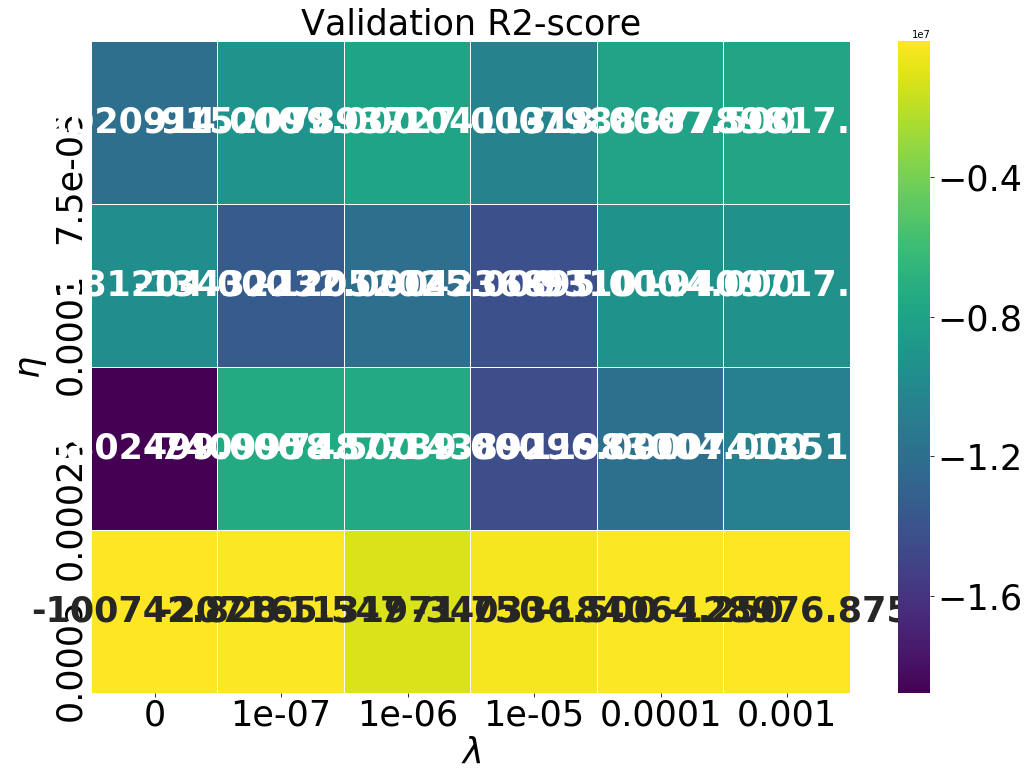

In [8]:
# visual representation of grid search
yticklabels = eta_vals
xticklabels = lmbd_vals

plt.subplots(figsize=(17,12))
ax=plt.subplot(1,1,1)
sns.heatmap(valid_r2_matrix, annot = True, fmt=".3f", linewidths=.1,
                cmap = "viridis",annot_kws={"size": 35, 'weight':'bold'},
           yticklabels = yticklabels, xticklabels = xticklabels);
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=35)
plt.ylabel(r'$\eta$',fontsize=35);
plt.xlabel(r'$\lambda$',fontsize=35);
all_sample_title = 'Validation R2-score'
plt.title(all_sample_title, size =35);
ax.tick_params(axis='x', which='major', labelsize=35,pad=1)
ax.tick_params(axis='y', which='major', labelsize=35,pad=1)
ax.set_ylim([len(eta_vals), 0])

#plt.savefig('../plot_img/network_grid_search.png', bbox_inches='tight', dpi=200)

## Use the trained models provided by the authors to plot the history R2-score.

In [ ]:
# load the trained models provided by the authors and calculate the R2-score on validation data
valid_r2_matrix = np.zeros((len(eta_vals), len(lmbd_vals)))

for i, eta in enumerate(eta_vals):
    for j, lmbd in enumerate(lmbd_vals):

        prev_model   = '../model/eta{}_lmd{}_model.h5'.format(eta, lmbd)
        prev_weights = '../weights/eta{}_lmd{}_weights.h5'.format(eta, lmbd)
        CNN          = load_model(prev_model)
        weights      = CNN.load_weights(prev_weights)
        
        denoised_valid        = CNN.predict(noisy_valid)
        valid_r2_matrix[i][j] = fx.R2Score(denoised_valid, clean_valid)
        
# visual representation of grid search
sns.set()
yticklabels = eta_vals
xticklabels = lmbd_vals

plt.subplots(figsize=(17,12))
ax=plt.subplot(1,1,1)
sns.heatmap(valid_r2_matrix, annot = True, fmt=".3f", linewidths=.1,
                cmap = "viridis",annot_kws={"size": 35, 'weight':'bold'},
           yticklabels = yticklabels, xticklabels = xticklabels);
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=35)
plt.ylabel(r'$\eta$',fontsize=35);
plt.xlabel(r'$\lambda$',fontsize=35);
all_sample_title = 'Validation R2-score'
plt.title(all_sample_title, size =35);
ax.tick_params(axis='x', which='major', labelsize=35,pad=1)
ax.tick_params(axis='y', which='major', labelsize=35,pad=1)
ax.set_ylim([len(eta_vals), 0])

#plt.savefig('../plot_img/network_grid_search_hist.png', bbox_inches='tight', dpi=200)